In [272]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import minmax_scale
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PowerTransformer
# from sklearn.linear_model import LinearRegression
# import statsmodels.api as sm
# from scipy.stats import boxcox
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error as mse
# from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
import openpyxl
import xlrd


In [273]:
def extract_month(value):
    return value.split("/")[0]

In [274]:
def gender_generalize(gender:[str], replace_nan:[str] = "---"):
    """changes the genders to female if f in str, else male. if gender = nan returns ---"""
    if type(gender) != str:
        return replace_nan
    if "f" in gender.lower():
        return "female"
    else:
        return "male"

In [275]:
def split_df_in_numeric_categ_dfs(this_df):
    """takes in a dataframe, finds numerical (float, int) and categorical and returns them as tuple (num_df, cat_df)"""
    numer_lst = [_ for _ in this_df.select_dtypes(include=['int','float']).dtypes.index]
    cat_lst = [_ for _ in this_df.select_dtypes(exclude=['int','float']).dtypes.index]
    return (this_df[numer_lst], this_df[cat_lst])

In [276]:
def lowercase_underscore_column_names(this_df):
    """changes all columnnames to lower case and replace space with underscore"""
    for col in this_df.columns:
        this_df.rename(columns={col:col.lower().replace(" ", "_")}, inplace=True)
    return this_df

In [232]:
def distrib_plots(num_df):
    """creates plot for every column, checks column is numerical and automatically adjusts the grid matrix"""
    matrix_size = math.ceil(len(num_df)**0.5)
    plt.figure(figsize = (14,12))
    for i, col in enumerate(num_df.columns, 1):
        if is_numeric_dtype(num_df[col]):
            plt.subplot(3,3,i)
            sns.distplot(num_df[col], kde=True)


C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

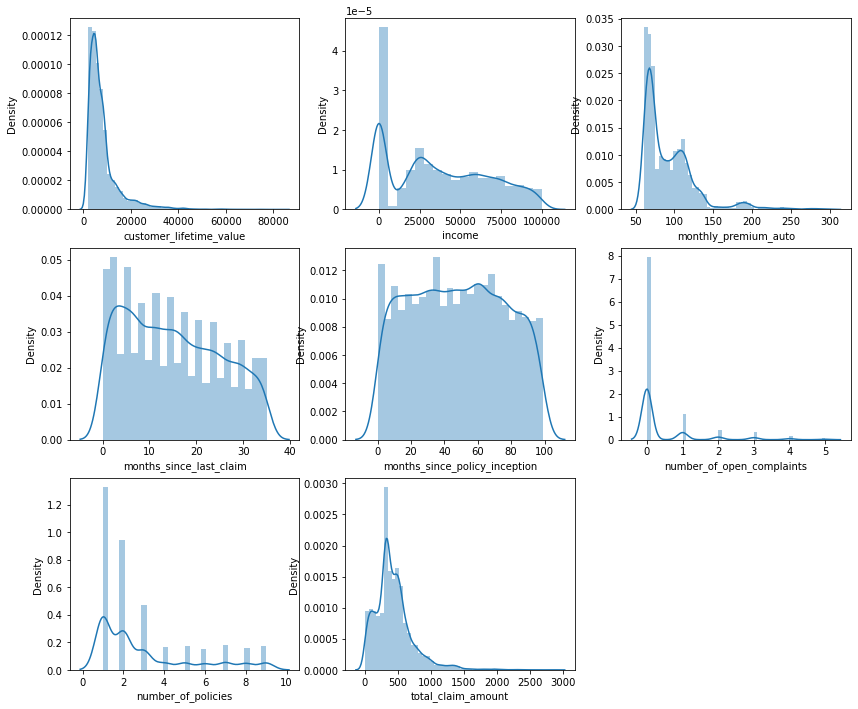

In [233]:
distrib_plots(numerical_df)

In [315]:
def dis_plot1(num_df):
    for col in num_df.columns[1:]:
        print(col)
        sns.displot(kind='kde', data=num_df, col=col, col_wrap=3, fill=True, facet_kws={'sharey': False, 'sharex': False})

In [316]:
dis_plot1(num_df1)

customer_lifetime_value


ValueError: The following variable cannot be assigned with wide-form data: `col`

In [277]:
def hist_plots(num_df):
    """creates plot for every column, checks column is numerical and automatically adjusts the grid matrix"""
    matrix_size = math.ceil(len(num_df)**0.5)   # create square matrix according to number of columns 
    plt.figure(figsize = (14,12))
    for i, col in enumerate(num_df.columns, 1):
        if is_numeric_dtype(num_df[col]):
            plt.subplot(3,3,i)
            sns.histplot(num_df[col], kde=True)


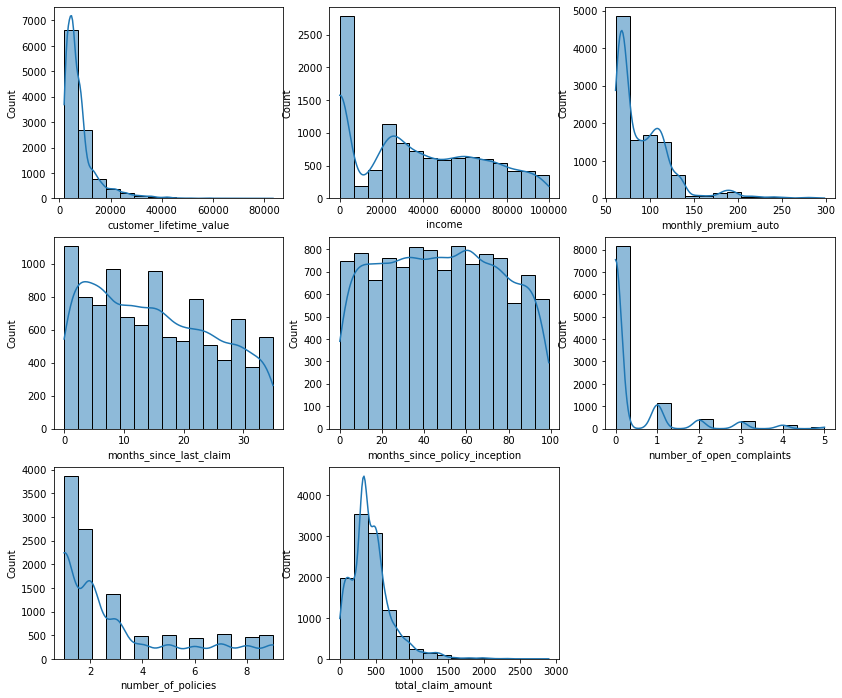

In [203]:
hist_plots(numerical_df)

In [205]:
def heat_map(num_df):
    corr = num_df.loc[num_df['income'] != 0].corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(9, 7))
        ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

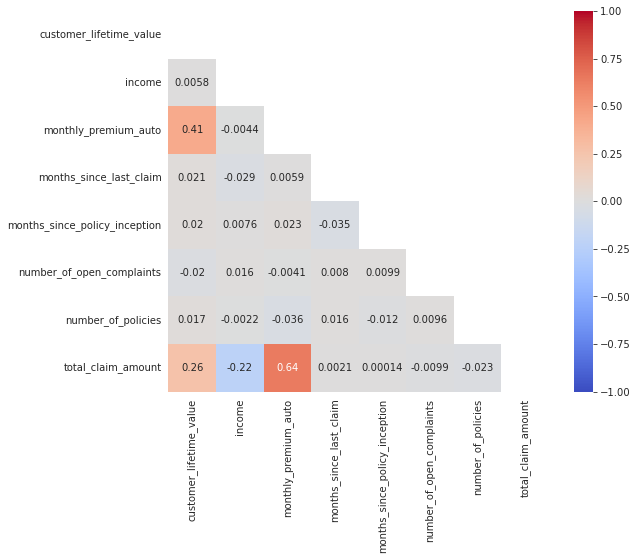

In [206]:
heat_map(numerical_df)

In [195]:
numerical_df["income"].value_counts()

0        2787
95697      15
60920      11
68931      10
11432      10
         ... 
45310       1
88055       1
74606       1
88043       1
64195       1
Name: income, Length: 5694, dtype: int64

In [323]:
raw_df = pd.read_csv("C:/Users/roman/Documents/GitHub/Customer_Data_Analysis/Data/Data_Marketing_Customer_Analysis_Round2.csv")
# file1_df

In [324]:
raw_df.describe()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [325]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [326]:
lowercase_underscore_column_names(raw_df)
if "unnamed:_0" in raw_df.columns:
    raw_df = raw_df.drop(new_df.columns[0],axis=1)

<AxesSubplot:xlabel='response', ylabel='count'>

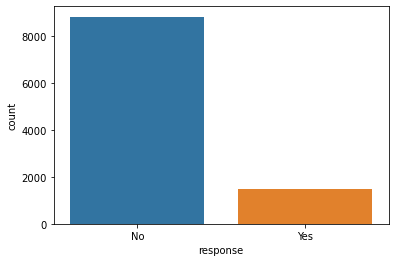

In [327]:
sns.countplot(x=raw_df["response"])


In [331]:
print(f"""The response rate was
    {round(raw_df['response'].value_counts()[0] / len(raw_df) * 100, 2)} % {raw_df['response'].value_counts().index[0]} and 
    {round(raw_df['response'].value_counts()[1] / len(raw_df) * 100, 2)} % {raw_df['response'].value_counts().index[1]}.""")
      

The response rate was
    80.78 % No and 
    13.44 % Yes.


In [282]:
file_df_no_zero_inc = raw_df.loc[raw_df['Income'] != 0]

In [283]:
file_df_no_zero_inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8123 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     8123 non-null   int64  
 1   Customer                       8123 non-null   object 
 2   State                          7661 non-null   object 
 3   Customer Lifetime Value        8123 non-null   float64
 4   Response                       7661 non-null   object 
 5   Coverage                       8123 non-null   object 
 6   Education                      8123 non-null   object 
 7   Effective To Date              8123 non-null   object 
 8   EmploymentStatus               8123 non-null   object 
 9   Gender                         8123 non-null   object 
 10  Income                         8123 non-null   int64  
 11  Location Code                  8123 non-null   object 
 12  Marital Status                 8123 non-null   

In [285]:
file_df_no_zero_inc = lowercase_underscore_column_names(file_df_no_zero_inc)

C:\Users\roman\Python\anaconda\envs\DA_Env\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [319]:
# x,y = 'class', 'survived'

# df1 = df.groupby(x)[y].value_counts(normalize=True)
# df1 = df1.mul(100)
# df1 = df1.rename('percent').reset_index()

# g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
# g.ax.set_ylim(0,100)

# for p in g.ax.patches:
#     txt = str(p.get_height().round(2)) + '%'
#     txt_x = p.get_x() 
#     txt_y = p.get_height()
#     g.ax.text(txt_x,txt_y,txt)


In [320]:
file_df_no_zero_inc.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

In [288]:
num_df1 = split_df_in_numeric_categ_dfs(file_df_no_zero_inc)[0]

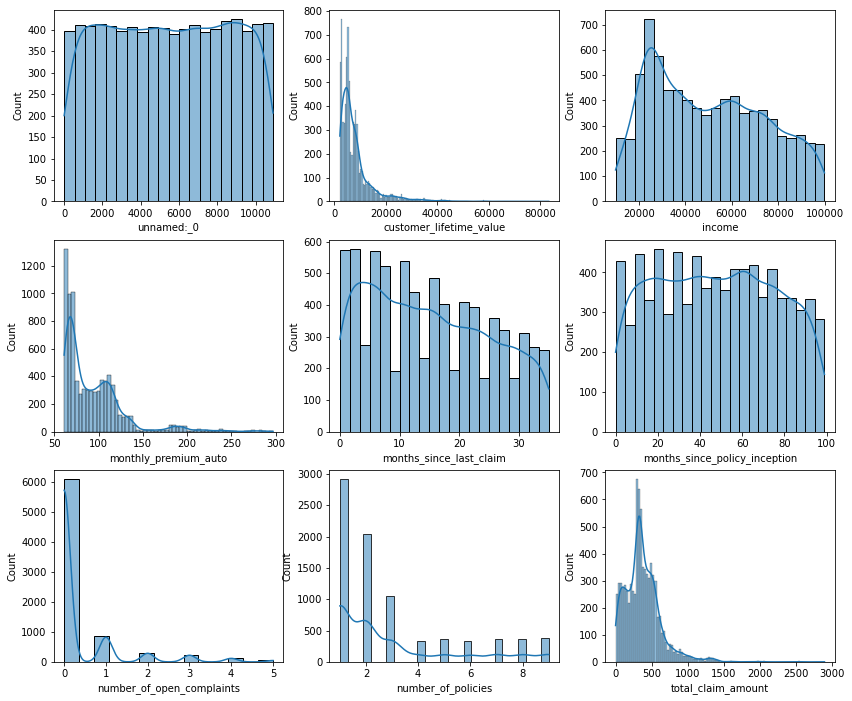

In [290]:
hist_plots(num_df1)

In [ ]:
#####################################

In [247]:
new_df = pd.read_csv("C:/users/roman/documents/tester.csv", index_col=False)

In [248]:
lowercase_underscore_column_names(new_df)
#new_df = new_df.drop("unnamed:_0",axis=1)

,customer_lifetime_value,monthly_premium_auto,total_claim_amount,number_of_open_complaints,income,policy_type,vehicle_class,gender,education,state,zones
0,7977,1000,2,0,0,Personal Auto,Four-Door Car,---,Master,Washington,east
1,6979,94,1131,0,0,Personal Auto,Four-Door Car,female,Bachelor,Arizona,central
2,12887,108,566,0,48767,Personal Auto,Two-Door Car,female,Bachelor,Nevada,central
3,7645,106,529,0,0,Corporate Auto,SUV,male,Bachelor,California,west
4,5363,68,17,0,36357,Personal Auto,Four-Door Car,male,High School or Below,Washington,east
...,...,...,...,...,...,...,...,...,...,...,...
9129,23405,73,198,0,71941,Personal Auto,Four-Door Car,male,Bachelor,California,west
9130,3096,79,379,0,21604,Corporate Auto,Four-Door Car,female,College,California,west
9131,8163,85,790,3,0,Corporate Auto,Four-Door Car,male,Bachelor,California,west
9132,7524,96,691,0,21941,Personal Auto,Four-Door Car,male,College,California,west


In [221]:
new_nu = split_df_in_numeric_categ_dfs(new_df)[0]

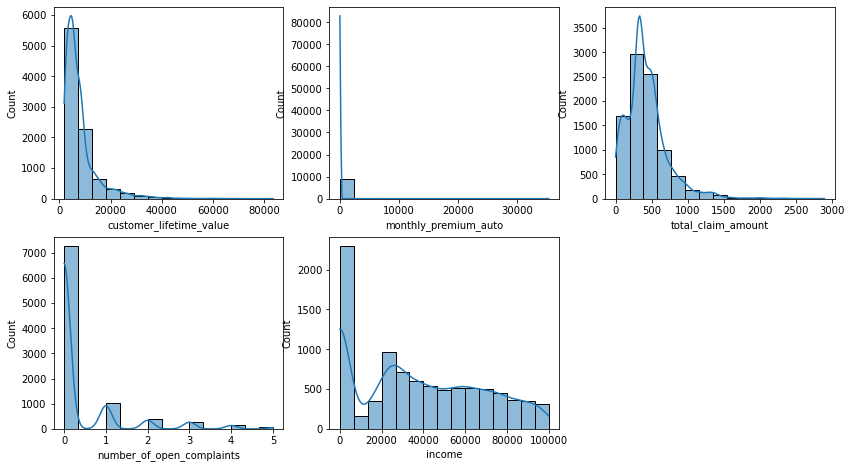

In [223]:
hist_plots(new_nu)

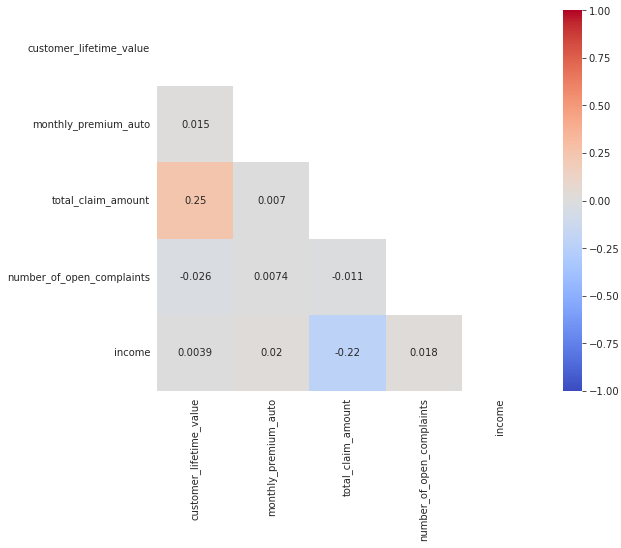

In [238]:
heat_map(new_nu)